In [1]:
import pandas as pd

cardio = pd.read_csv(r'/content/cardio_train.csv', sep=';',header=0)
cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
import numpy as np

In [3]:
cardio.shape

(70000, 13)

In [ ]:
cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:

age=np.array(cardio['age'])

In [ ]:
print(age)

[18393 20228 18857 ... 19066 22431 20540]


In [4]:
cardio['age'] = np.round(cardio['age']/365.24)
print(cardio['age'])

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64


In [ ]:
print("mean of the age values :\n",np.mean(cardio['age']))

mean of the age values :
 53.30457142857143


In [ ]:
print("min of the age values :\n",np.min(cardio['age']))

min of the age values :
 30.0


In [ ]:
print("max of the age values :\n",np.max(cardio['age']))

max of the age values :
 65.0


In [ ]:
from sklearn.model_selection import train_test_split

In [5]:
y=cardio['cardio']
x=cardio.drop(['cardio'],axis=1).copy()

In [6]:
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
X_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
58105,82903,50.0,1,158,66.0,110,70,1,1,0,0,1
22589,32272,48.0,2,188,86.0,120,80,1,1,0,0,0
4183,5906,48.0,2,165,63.0,120,80,1,1,0,0,1
18670,26660,48.0,1,172,105.0,140,90,1,1,0,0,1
41299,59019,60.0,1,164,70.0,110,70,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,70099,58.0,2,175,78.0,120,80,1,1,0,0,1
20609,29410,52.0,1,164,68.0,120,80,1,1,0,0,0
21440,30634,49.0,2,178,82.0,120,80,1,1,0,0,1
50057,71447,60.0,1,169,77.0,120,80,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_train_scaled = SS.fit_transform(X_train)
x_test_scaled = SS.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,Y_train)
y_predict = model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test,y_predict)
print("conf :",conf)

conf : [[6632 1977]
 [2923 5968]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test, y_predict)
print(accuracy)

0.72


In [ ]:
importance = pd.DataFrame(data = {'Attribute':X_train.columns,'Importance':model.coef_[0]})
importance = importance.sort_values(by = 'Importance',ascending = False)

In [ ]:
importance

,Attribute,Importance
5,ap_hi,6.199613
1,age,0.364683
7,cholesterol,0.353701
4,weight,0.215667
6,ap_lo,0.056832
2,gender,0.004931
0,id,0.001888
10,alco,-0.033570
3,height,-0.039535
9,smoke,-0.048167


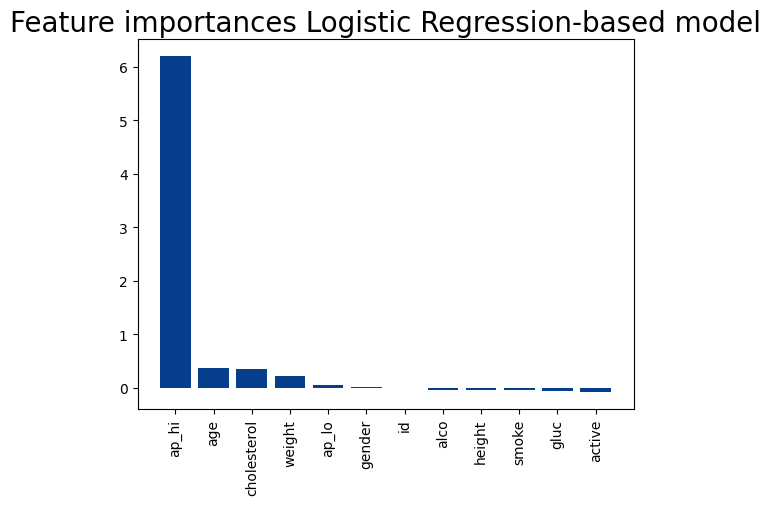

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=importance['Attribute'], height=importance['Importance'], color='#053E8B')
plt.title('Feature importances Logistic Regression-based model', size=20)
plt.xticks(rotation='vertical')
plt.show()

# New Section